In [1]:
#Blood cell subtype classification
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#TRAIN AND TEST DATASET ADDRESS
DATASET="images/TRAIN"
TEST_DATASET="images/TEST"

#Categroized images
#4 types of subcells
CATEGORIES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

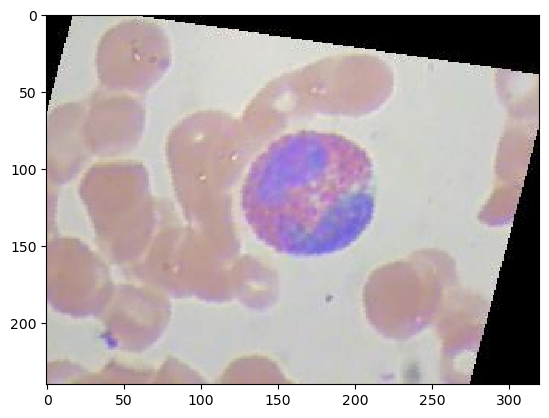

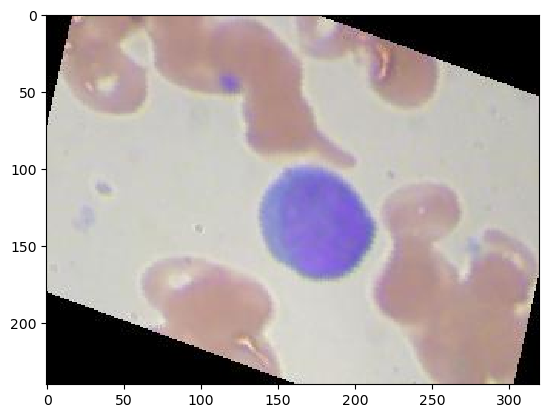

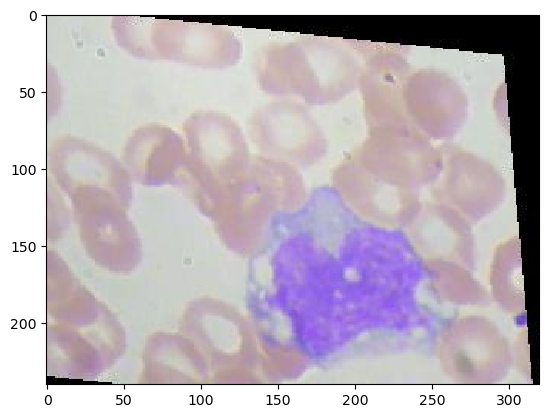

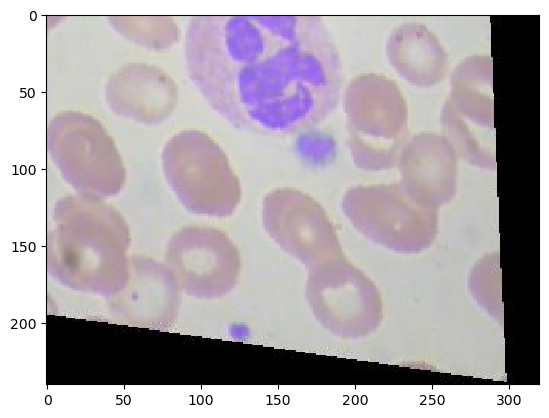

In [3]:
#reading original image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            
            #open cv read image in BGR format 
            #below we convert it to RGB format
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #print(img.shape)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

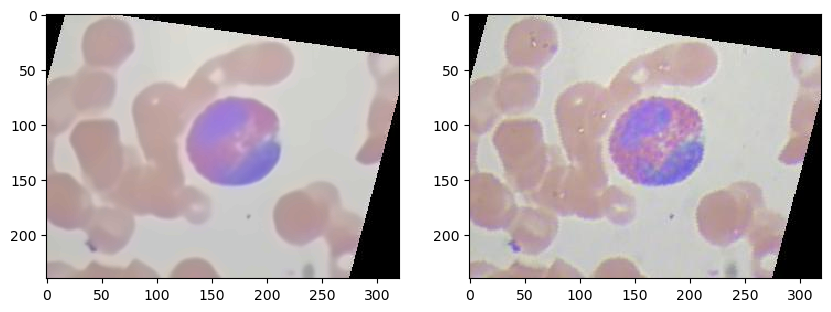

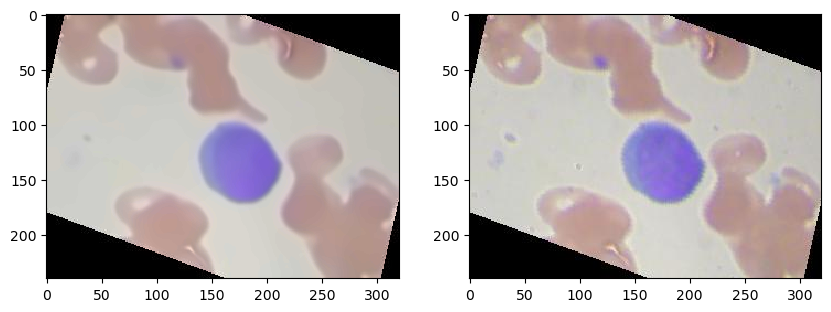

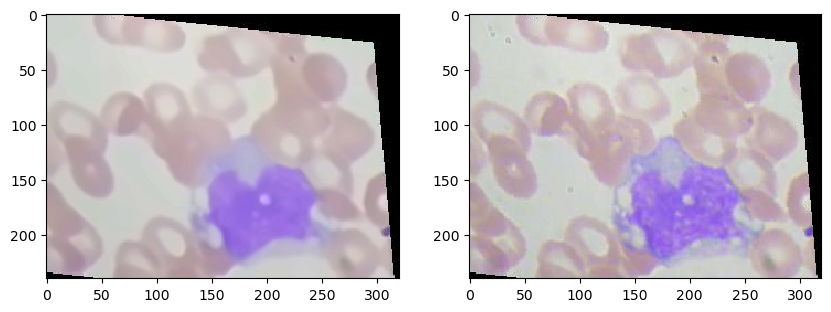

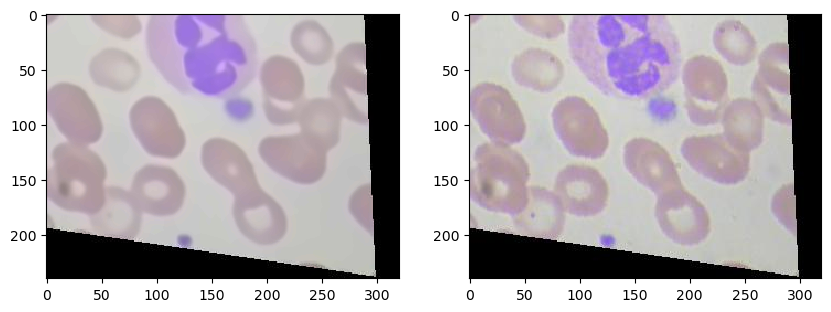

In [4]:
#reading image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            #image convert to smaller pixels 60*60
            #print(img.shape)
            plt.figure(figsize=(10,8))
            plt.subplot(121)
            plt.imshow(dst)
            plt.subplot(122)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

In [5]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])

In [6]:
#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))
            test_data.append([img,label])

In [7]:
#print total data in train and test
print(len(train_data))
print(len(test_data))

9957
2487


In [8]:
#shuffle the dataset fo good result

import random

random.shuffle(train_data)
random.shuffle(test_data)

In [9]:
#check the data
for lbl in train_data[:10]:
    print(lbl[1])

0
0
3
2
0
1
0
2
1
3


In [10]:
#lets seprate the feature and target variable
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(9957, 9957)

In [11]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(2487, 2487)

In [12]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B
train_X=np.array(train_X).reshape(-1,60,60,3)
train_X=train_X/255.0
train_X.shape

#we divide the np array by 255 to close all values to 0

(9957, 60, 60, 3)

In [13]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B

test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape

#we divide the np array by 255 to close all values to 0

(2487, 60, 60, 3)

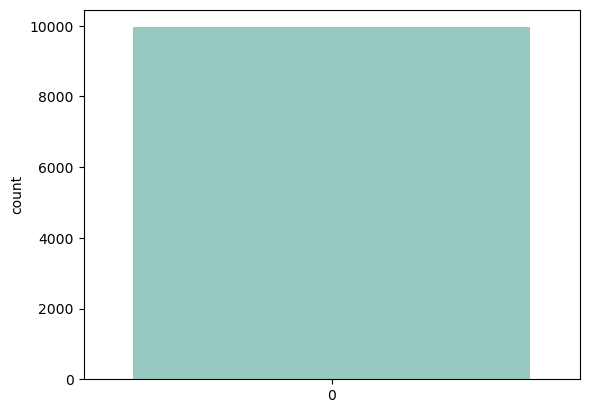

In [14]:
#count labels

sns.countplot(train_y,palette='Set3')
#we can see each categroy has equal data 

In [15]:
#convert label into the one hot encode
from keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

Using TensorFlow backend.
c:\users\bandaru nikith kumar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\bandaru nikith kumar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\bandaru nikith kumar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [16]:
#test_y
one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [17]:
#build the models
#import Keras libraries

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

In [19]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(60,60,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
          
model.add(Dense(4,activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
____

In [20]:
#we will choose adam optimizer
#we have 4 categories so loss function is categorical_crossentropy
#metrics accuracy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
#lets split the 20% train dataset for validation 
hist=model.fit(train_X,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)

Train on 7965 samples, validate on 1992 samples
Epoch 1/50
7965/7965 [==============================] - 33s 4ms/sample - loss: 1.3879 - acc: 0.2409 - val_loss: 1.3865 - val_acc: 0.2410
Epoch 2/50
7965/7965 [==============================] - 27s 3ms/sample - loss: 1.3866 - acc: 0.2540 - val_loss: 1.3865 - val_acc: 0.2369
Epoch 3/50
7965/7965 [==============================] - 26s 3ms/sample - loss: 1.3860 - acc: 0.2454 - val_loss: 1.3834 - val_acc: 0.2309
Epoch 4/50
7965/7965 [==============================] - 26s 3ms/sample - loss: 1.3250 - acc: 0.3533 - val_loss: 1.2352 - val_acc: 0.4167
Epoch 5/50
7965/7965 [==============================] - 26s 3ms/sample - loss: 1.1649 - acc: 0.4586 - val_loss: 1.1107 - val_acc: 0.4975
Epoch 6/50
7965/7965 [==============================] - 27s 3ms/sample - loss: 1.0742 - acc: 0.5082 - val_loss: 1.0165 - val_acc: 0.5161
Epoch 7/50
7965/7965 [==============================] - 26s 3ms/sample - loss: 1.0069 - acc: 0.5436 - val_loss: 1.0576 - val_acc: 

In [22]:
#model evaluation
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

2487/2487 [==============================] - 2s 662us/sample - loss: 0.7986 - acc: 0.7672


(0.798553042302517, 0.7671894)

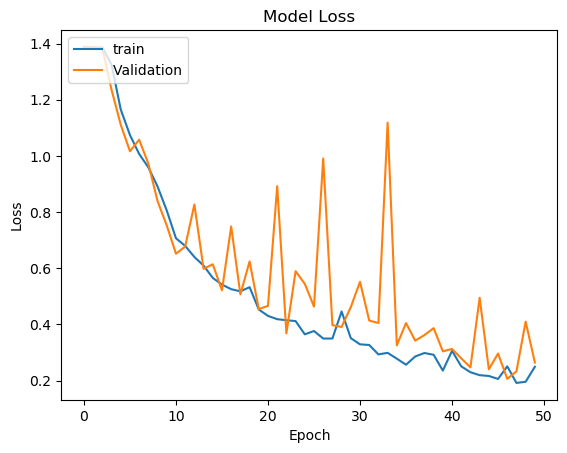

In [23]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

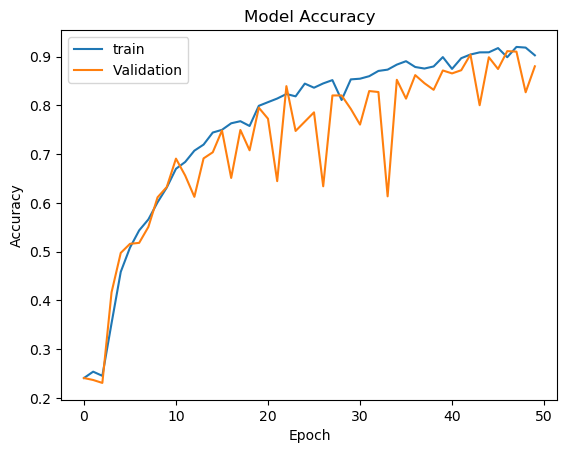

In [24]:
#train and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [25]:
#model prediction

y_pred=model.predict_classes(test_X)
y_pred

array([2, 3, 3, ..., 1, 1, 2], dtype=int64)

In [26]:
for i in range(10):
	print("Actual=%s, Predicted=%s" % (test_y[i], y_pred[i]))

Actual=2, Predicted=2
Actual=0, Predicted=3
Actual=3, Predicted=3
Actual=0, Predicted=3
Actual=0, Predicted=0
Actual=3, Predicted=3
Actual=3, Predicted=3
Actual=2, Predicted=2
Actual=2, Predicted=3
Actual=0, Predicted=3


In [27]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)

0.767189384800965

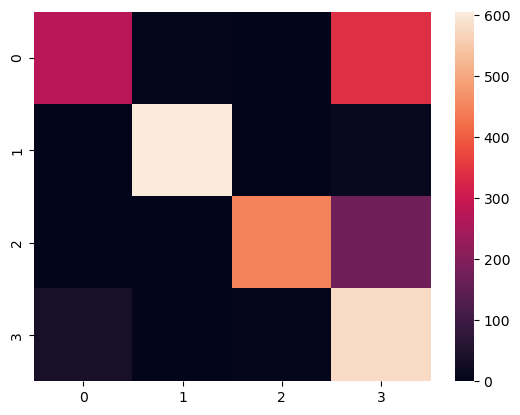

In [28]:
sns.heatmap(confusion_matrix(test_y,y_pred))